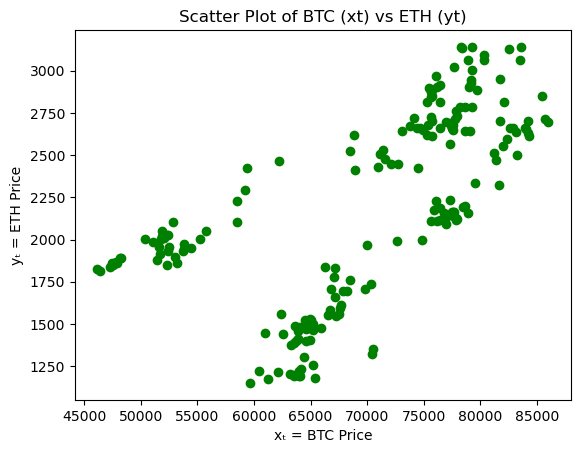

Sample xt (BTC): [47278.8  47866.95 47550.8  47465.64 46381.09 46171.05 47812.47 48272.28
 48151.18 50381.49]
Sample yt (ETH): [1839.62 1859.63 1851.15 1863.98 1813.04 1826.07 1865.64 1891.79 1890.42
 2005.18]


In [287]:
import requests
import numpy as np
import matplotlib.pyplot as plt

#Historical daily price data for a cryptocurrency using the CryptoCompare API
def get_crypto_data(symbol, limit=200):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday"
    params = {
        'fsym': symbol,
        'tsym': 'GBP',
        'limit': limit,
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = [day['close'] for day in data['Data']['Data']]
    return np.array(prices)

# Fetch BTC and ETH prices (xₜ and yₜ)
xt = get_crypto_data("BTC")
yt = get_crypto_data("ETH")

# Ensure equal lengths
min_len = min(len(xt), len(yt))
xt, yt = xt[:min_len], yt[:min_len]

# Plot repersenting the relationship BTC and ETH
plt.scatter(xt, yt, color='green')
plt.xlabel("xₜ = BTC Price")
plt.ylabel("yₜ = ETH Price")
plt.title("Scatter Plot of BTC (xt) vs ETH (yt)")
plt.show()

print(f"Sample xt (BTC): {xt[:10]}")
print(f"Sample yt (ETH): {yt[:10]}")

Analytical OLS Results:
α = -241.7096, β = 0.0347


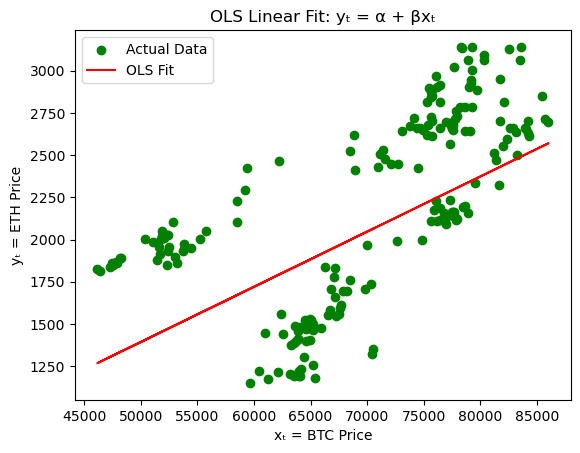

In [288]:
# OLS Estimation
beta = ((xt * yt).mean() - xt.mean() * yt.mean()) / ((xt * xt).mean() - (xt.mean())**2)
alpha = yt.mean() - beta * xt.mean()

print(f"Analytical OLS Results:\nα = {alpha:.4f}, β = {beta:.4f}")

# Predicted y
y_hat = alpha_ols + beta_ols * xt

# Plot Regression Line
plt.scatter(xt, yt, color='green', label="Actual Data")
plt.plot(xt, y_hat, color='red', label="OLS Fit")
plt.legend()
plt.title("OLS Linear Fit: yₜ = α + βxₜ")
plt.xlabel("xₜ = BTC Price")
plt.ylabel("yₜ = ETH Price")
plt.show()


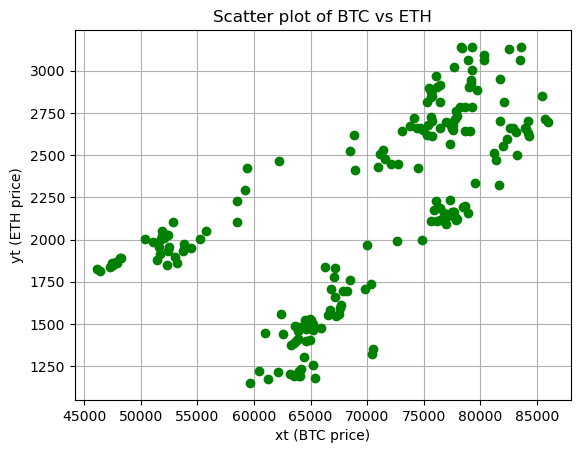

In [289]:
#Gradient Descent 

plt.plot(xt, yt, 'go') 
plt.xlabel("xt (BTC price)")
plt.ylabel("yt (ETH price)")
plt.title("Scatter plot of BTC vs ETH")
plt.grid(True)
plt.show()


In [290]:
beta = ((np.multiply(yt, xt)).mean() - np.mean(xt) * np.mean(yt)) / ((np.multiply(xt, xt)).mean() - np.mean(xt) * np.mean(xt))
alpha = np.mean(yt) - beta * np.mean(xt)

print("alpha =", alpha, "\nbeta =", beta)

alpha = -241.70964084223579 
beta = 0.03465736267414073


In [291]:
x_new = np.array([[-9], [6]])
y_new_hat = alpha + np.multiply(beta, x_new)
print("Predicted y values for x_new:", y_new_hat)


Predicted y values for x_new: [[-242.02155711]
 [-241.50169667]]


In [292]:
y_hat = alpha + np.multiply(beta, x_new)
print("Predicted y values for x_new:", y_new_hat)

Predicted y values for x_new: [[-242.02155711]
 [-241.50169667]]


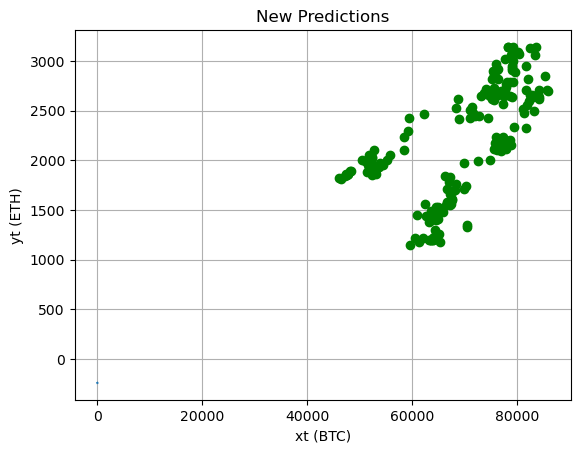

In [293]:
plt.plot(x_new, y_hat)       
plt.plot(xt, yt, 'go')      
plt.xlabel("xt (BTC)")
plt.ylabel("yt (ETH)")
plt.title("New Predictions")
plt.grid(True)
plt.show()

In [294]:
alpha = np.mean(yt) - beta * np.mean(xt)
# Cost Function
def cal_cost(alpha, beta, xt, yt):
    n = len(yt)
    predictions = alpha + np.multiply(beta, xt)
    cost = (1 / (2 * n)) * np.sum(np.square(predictions - yt))
    return cost


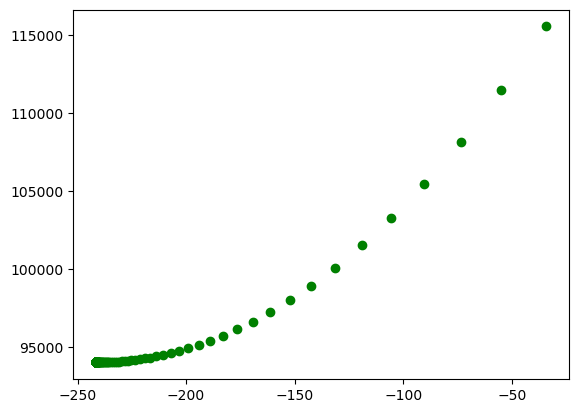

In [295]:
#Gradient Descent Optimization for Linear Regression
iterations = 1000
alpha = -11
n = len(yt)

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    
        
        prediction = alpha + np.multiply(beta,xt)
        residuals = yt-prediction
        residuals_sum = sum(residuals)
        gradient = -(1/n)*0.1*residuals_sum
 
        alpha = alpha - gradient
    
        loss_history[i] = cal_cost(alpha,beta,xt,yt)
        alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

In [296]:
beta = ((np.multiply(yt, xt)).mean()
        - np.mean(xt)*np.mean(yt)) \
       / ((np.multiply(xt, xt)).mean()
          - np.mean(xt)*np.mean(xt))
alpha_ols = np.mean(yt) - beta * np.mean(xt)
print("alpha:", alpha_ols)


alpha: -241.70964084223579


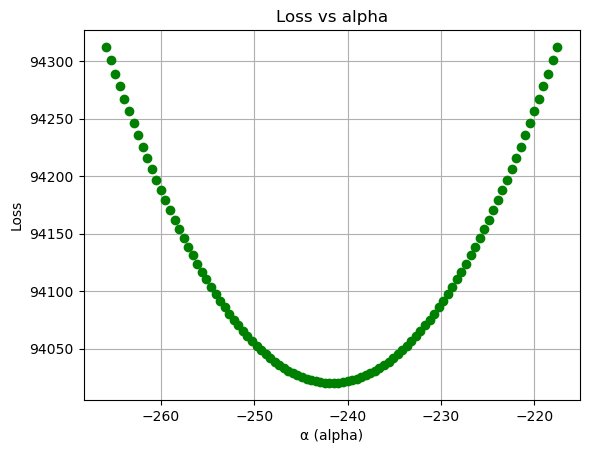

In [297]:
# alpha_ols
pct = 0.10  # 10%

alpha_min = alpha_ols * (1 - pct)
alpha_max = alpha_ols * (1 + pct)

# Generate 100 points between alpha_min and alpha_max
alpha_values = np.linspace(alpha_min, alpha_max, 100).reshape(-1, 1)

# Compute loss at each α
loss_history = np.zeros_like(alpha_values)
for i, a in enumerate(alpha_values):
    loss_history[i] = cal_cost(a, beta, xt, yt)

# Plot
plt.plot(alpha_values, loss_history, 'go')
plt.xlabel("α (alpha)")
plt.ylabel("Loss")
plt.title(f"Loss vs alpha")
plt.grid(True)
plt.show()

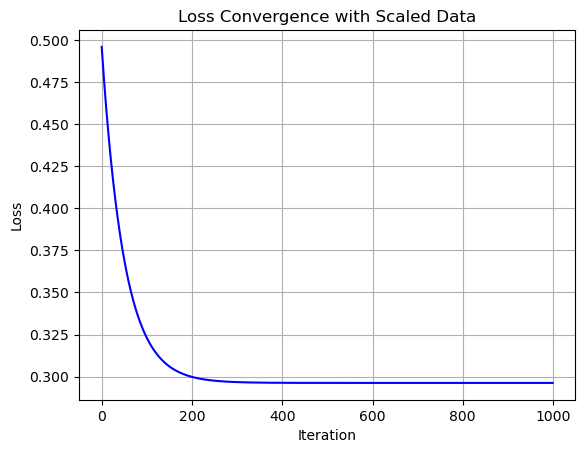

 Final alpha : -241.9411
Final beta: 0.0347


In [298]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize xt and yt
xt_mean = np.mean(xt)
xt_std = np.std(xt)
xt_scaled = (xt - xt_mean) / xt_std

yt_mean = np.mean(yt)
yt_std = np.std(yt)
yt_scaled = (yt - yt_mean) / yt_std

# Step 2: Define cost function
def cal_cost(alpha, beta, x, y):
    n = len(y)
    predictions = alpha + beta * x
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

# Step 3: Initialize parameters
iterations = 1000
learning_rate = 0.01
alpha = 0.0
beta = 0.0
n = len(yt_scaled)

# History tracking
loss_history = np.zeros((iterations, 1))
alpha_history = np.zeros((iterations, 1))
beta_history = np.zeros((iterations, 1))

# Step 4: Gradient Descent Loop
for i in range(iterations):
    prediction = alpha + beta * xt_scaled
    residuals = yt_scaled - prediction

    d_alpha = - (1 / n) * np.sum(residuals)
    d_beta = - (1 / n) * np.sum(residuals * xt_scaled)

    alpha = alpha - learning_rate * d_alpha
    beta = beta - learning_rate * d_beta

    alpha_history[i] = alpha
    beta_history[i] = beta
    loss_history[i] = cal_cost(alpha, beta, xt_scaled, yt_scaled)

# Step 5: Plot Loss
plt.plot(loss_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Convergence with Scaled Data")
plt.grid(True)
plt.show()



print(f" Final alpha : {alpha_unscaled:.4f}")
print(f"Final beta: {beta_unscaled:.4f}")


In practice, achieving convergence to a loss function minimum using gradient descent can be challenging, especially when working with financial time series data. One primary reason is the scale and variability of financial data. For example, cryptocurrencies like Bitcoin or Ethereum can exhibit extremely high volatility, large numerical values, and irregular behavior over time. If features are not standardized (i.e., transformed to have zero mean and unit variance), the gradient descent algorithm may take overly aggressive steps (diverging to infinity or producing NaN values), or conversely, make updates so small that convergence is excessively slow. Poor conditioning where the relationship between variables leads to steep, narrow valleys in the loss function can further exacerbate this issue, making it hard for the optimizer to find a smooth path to the minimum.

Additionally, the choice of learning rate significantly impacts convergence. A learning rate that is too high may cause the optimizer to overshoot the loss minimum repeatedly, never settling down. On the other hand, a learning rate that is too small results in slow learning, increasing computational time and risking early stopping before reaching a useful model. This becomes more pronounced in noisy data like market prices, where sudden, unexpected changes in value can mislead the gradient and drive parameters away from optimal solutions.

Another major challenge is the presence of **non-stationarity** in financial data where the mean, variance, or other statistical properties of the series change over time. Gradient descent assumes a relatively stable loss surface; if the underlying data distribution keeps shifting, the loss surface also changes during training, which can cause instability or convergence to suboptimal values. Moreover, financial data often exhibit autocorrelation, structural breaks, and regime shifts, all of which complicate gradient-based optimization.

To address these problems, several strategies can be employed. First, data should be standardized or normalized to stabilize gradient updates. Second, a carefully tuned learning rate should be used, potentially combined with learning rate decay schedules to reduce the rate as training progresses. Third, robust optimization techniques such as Adam, RMSprop, or Adagrad can be used, as they adaptively adjust learning rates for each parameter and are more resilient to noisy gradients. Fourth, transforming data to achieve stationarity (e.g., through differencing or log-returns) makes the modeling process more stable and statistically valid. Finally, applying techniques such as early stopping, gradient clipping, and regularization can further mitigate convergence issues and improve model generalization.

In summary, convergence difficulties in gradient descent are typically caused by data scale, poor feature conditioning, noise, non-stationarity, and inappropriate learning rates. Addressing these with preprocessing, normalization, adaptive learning methods, and robust model diagnostics ensures that gradient-based models can converge effectively in real-world financial applications.